In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df_base = pd.read_csv('data/food-facts/data.featureEngineering.tsv', sep='\t', dtype={'code':str})

In [13]:
df_base.shape

(170233, 9)

In [14]:
df_base.head()

,code,created_datetime,product_name,brands,ingredients_text,sugars_100g,salt_100g,sodium_100g,organic
0,4559,03/09/2017,Peanuts,Torn & Glasser,"Peanuts, wheat flour, sugar, rice flour, tapio...",17.86,0.63500,0.250,0
1,16087,03/09/2017,Organic Salted Nut Mix,Grizzlies,"Organic hazelnuts, organic cashews, organic wa...",3.57,1.22428,0.482,1
2,16094,03/09/2017,Organic Polenta,Bob's Red Mill,Organic polenta,0.00,0.00000,0.000,1
3,16100,03/09/2017,Breadshop Honey Gone Nuts Granola,Unfi,"Rolled oats, grape concentrate, expeller press...",11.54,0.00000,0.000,0
4,16117,03/09/2017,Organic Long Grain White Rice,Lundberg,Organic long grain white rice,0.00,0.00000,0.000,1


In [15]:
grp_organic = df_base.groupby('organic')

In [35]:
df_grp_organic = pd.DataFrame({'organic_count' : grp_organic.size()})

In [36]:
#df_grp_organic.index = ['Non-organic','organic']

In [37]:
df_grp_organic['organic_portion'] = df_grp_organic['organic_count'] / df_base.shape[0]

In [39]:
df_grp_organic['total_sugar'] = df_base.pivot_table('sugars_100g', columns='organic', aggfunc=sum).T

In [41]:
df_grp_organic['total_sugar_portion'] = df_grp_organic['total_sugar'] / df_grp_organic['total_sugar'].sum()

In [43]:
df_grp_organic['total_salt'] = df_base.pivot_table('salt_100g', columns='organic', aggfunc=sum).T

In [45]:
df_grp_organic['total_salt_portion'] = df_grp_organic['total_salt'] / df_grp_organic['total_salt'].sum()

In [47]:
df_grp_organic.index = ['Non-organic','organic']

In [48]:
df_grp_organic

,organic_count,organic_portion,total_sugar,total_sugar_portion,total_salt,total_salt_portion
Non-organic,161234,0.947137,2574143.986,0.959145,362371.076512,0.98335
organic,8999,0.052863,109646.387,0.040855,6135.461875,0.01665


In [50]:
df_base['brands'].value_counts().shape

(23977,)

In [51]:
mask_brand = df_base['brands'].value_counts()[0:50].index

In [52]:
mask_brand

Index(['Meijer', 'Kroger', 'Great Value', 'Ahold', 'Spartan', 'Roundy's',
       'Weis', 'Food Lion', 'Shoprite', 'Harris Teeter', 'Giant Eagle',
       'Hy Vee', 'Food Club', 'Hannaford', 'Target Stores',
       'Whole Foods Market', '365 Everyday Value', 'Wegmans',
       'Essential Everyday', 'Market Pantry', 'Goya', 'Schnucks',
       'Weis Quality', 'Giant', 'Trader Joe's', 'Fresh & Easy', 'Tops',
       'Big Y', 'Winn Dixie', 'Clover Valley', 'Brookshire's', 'Key Food',
       'Wal Mart Stores', 'Mccormick', 'Raley's', 'Nice', 'Western Family',
       'Valu Time', 'Hormel', 'Signature Kitchens', 'Southern Home',
       'Gold Emblem', 'Lowes Foods', 'Shurfine', 'Wilton', 'Private Selection',
       'Dannon', 'Archer Farms', 'Wild Harvest', 'Safeway'],
      dtype='object')

In [56]:
df_50brands = df_base[(df_base['brands'].isin(mask_brand))]

In [58]:
df_50brands.shape

(37610, 9)

In [59]:
df_50brands.head()

,code,created_datetime,product_name,brands,ingredients_text,sugars_100g,salt_100g,sodium_100g,organic
158,20039127,03/10/2017,Butter Croissants,Fresh & Easy,"Wheat flour, butter (cream), water, yeast, sug...",5.19,1.08966,0.429,0
159,20039707,03/10/2017,Wild Blueberry Muffins,Fresh & Easy,"Enriched wheat flour (wheat flour, malted barl...",25.93,0.72898,0.287,0
160,20042509,03/10/2017,Bolillos,Fresh & Easy,"Enriched wheat flour (wheat flour niacin, redu...",2.13,1.27000,0.500,0
161,20043070,03/10/2017,Biscuit,Fresh & Easy,"Enriched wheat flour (niacin, reduced iron, th...",2.67,1.42240,0.560,0
162,20043087,03/10/2017,Biscuit,Fresh & Easy,"Enriched wheat flour (niacin, reduced iron, th...",9.33,1.15062,0.453,0


In [146]:
grp_brand_sugar = df_50brands['sugars_100g'].groupby([df_50brands['brands'],df_50brands['organic']]).count()

In [147]:
grp_brand_sugar.head()

brands              organic
365 Everyday Value  0           616
                    1           297
Ahold               0          1285
                    1            92
Archer Farms        0           309
Name: sugars_100g, dtype: int64

In [148]:
df_brand = grp_brand_sugar.unstack()

In [149]:
df_brand.columns = ['Non-organic-count','Organic-count']

In [150]:
df_brand['Non-organic-count'] = df_brand['Non-organic-count'].astype(int)
df_brand['Organic-count'] = df_brand['Organic-count'].fillna(0).astype(int)

In [151]:
df_brand.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 365 Everyday Value to Winn Dixie
Data columns (total 2 columns):
Non-organic-count    50 non-null int32
Organic-count        50 non-null int32
dtypes: int32(2)
memory usage: 800.0+ bytes


In [152]:
df_brand['Non-organic-portion'] = df_brand['Non-organic-count'] / df_brand.sum(axis=1)
df_brand['Organic-portion'] = df_brand['Organic-count'] / df_brand.sum(axis=1)

In [153]:
df_brand.head()

,Non-organic-count,Organic-count,Non-organic-portion,Organic-portion
brands,,,,
365 Everyday Value,616,297,0.674699,0.325061
Ahold,1285,92,0.933188,0.066767
Archer Farms,309,3,0.990385,0.009585
Big Y,513,0,1.000000,0.000000
Brookshire's,457,0,1.000000,0.000000


In [154]:
df_bands_sugar = df_50brands.pivot_table('sugars_100g', index="organic", columns='brands', aggfunc=sum).T

In [155]:
df_bands_sugar.columns = ['Non-organic-sugar','Organic-sugar']

In [156]:
df_bands_sugar['Organic-sugar'] = df_bands_sugar['Organic-sugar'].fillna(0.0)

In [157]:
df_bands_sugar['N-sugar-portion'] = df_bands_sugar['Non-organic-sugar'] / df_bands_sugar.sum(axis=1)
df_bands_sugar['O-sugar-portion'] = df_bands_sugar['Organic-sugar'] / df_bands_sugar.sum(axis=1)

In [158]:
df_bands_sugar.head()

,Non-organic-sugar,Organic-sugar,N-sugar-portion,O-sugar-portion
brands,,,,
365 Everyday Value,5851.36,2980.07,0.662561,0.337414
Ahold,18134.62,765.59,0.959493,0.040505
Archer Farms,4852.67,6.94,0.998572,0.001428
Big Y,6022.27,0.00,1.000000,0.000000
Brookshire's,7176.99,0.00,1.000000,0.000000


In [159]:
df_brand = pd.merge(df_brand, df_bands_sugar, left_index = True, right_index = True)

In [160]:
df_brand.head()

,Non-organic-count,Organic-count,Non-organic-portion,Organic-portion,Non-organic-sugar,Organic-sugar,N-sugar-portion,O-sugar-portion
brands,,,,,,,,
365 Everyday Value,616,297,0.674699,0.325061,5851.36,2980.07,0.662561,0.337414
Ahold,1285,92,0.933188,0.066767,18134.62,765.59,0.959493,0.040505
Archer Farms,309,3,0.990385,0.009585,4852.67,6.94,0.998572,0.001428
Big Y,513,0,1.000000,0.000000,6022.27,0.00,1.000000,0.000000
Brookshire's,457,0,1.000000,0.000000,7176.99,0.00,1.000000,0.000000


In [161]:
df_brand.shape

(50, 8)

In [162]:
df_bands_salt = df_50brands.pivot_table('salt_100g', index="organic", columns='brands', aggfunc=sum).T
df_bands_salt.columns = ['Non-organic-salt','Organic-salt']
df_bands_salt['Organic-salt'] = df_bands_salt['Organic-salt'].fillna(0.0)
df_bands_salt['N-salt-portion'] = df_bands_salt['Non-organic-salt'] / df_bands_salt.sum(axis=1)
df_bands_salt['O-salt-portion'] = df_bands_salt['Organic-salt'] / df_bands_salt.sum(axis=1)

In [163]:
df_bands_salt.head()

,Non-organic-salt,Organic-salt,N-salt-portion,O-salt-portion
brands,,,,
365 Everyday Value,631.16714,240.03254,0.724480,0.275291
Ahold,1436.64940,54.17820,0.963659,0.036318
Archer Farms,409.94330,1.92786,0.995319,0.004669
Big Y,569.35938,0.00000,1.000000,0.000000
Brookshire's,1205.75324,0.00000,1.000000,0.000000


In [164]:
df_brand = pd.merge(df_brand, df_bands_salt, left_index = True, right_index = True)

In [165]:
df_brand.head()

,Non-organic-count,Organic-count,Non-organic-portion,Organic-portion,Non-organic-sugar,Organic-sugar,N-sugar-portion,O-sugar-portion,Non-organic-salt,Organic-salt,N-salt-portion,O-salt-portion
brands,,,,,,,,,,,,
365 Everyday Value,616,297,0.674699,0.325061,5851.36,2980.07,0.662561,0.337414,631.16714,240.03254,0.724480,0.275291
Ahold,1285,92,0.933188,0.066767,18134.62,765.59,0.959493,0.040505,1436.64940,54.17820,0.963659,0.036318
Archer Farms,309,3,0.990385,0.009585,4852.67,6.94,0.998572,0.001428,409.94330,1.92786,0.995319,0.004669
Big Y,513,0,1.000000,0.000000,6022.27,0.00,1.000000,0.000000,569.35938,0.00000,1.000000,0.000000
Brookshire's,457,0,1.000000,0.000000,7176.99,0.00,1.000000,0.000000,1205.75324,0.00000,1.000000,0.000000


In [167]:
df_grp_organic.head()

,organic_count,organic_portion,total_sugar,total_sugar_portion,total_salt,total_salt_portion
Non-organic,161234,0.947137,2574143.986,0.959145,362371.076512,0.98335
organic,8999,0.052863,109646.387,0.040855,6135.461875,0.01665


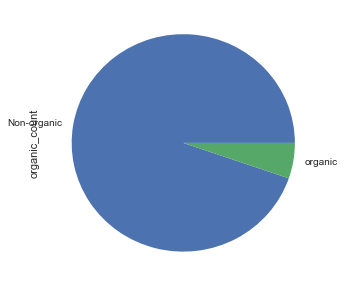

In [179]:
df_grp_organic['organic_count'].plot(kind='pie', figsize=(5,5))

In [182]:
#plt.scatter(df_base['salt_100g'],df_base['sugars_100g'])